## <font color="red">*Exercise 1*</font>

<font color="red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

## <font color="green">For this assignment, I was originally looking at long documents however, prof Evans suggested that I use the same bridal ads data for clustering and topic modelling since sometimes shorter documents work better for these methods owing to the tight knit structure of the words. Thus, for this assignment I use ads seeking grooms for the entire year of 2014 as separate documents which is about 23000 ads.</font>

 <font color="green"> 
1. As it can be observed, since this data is not clean, and a little nuanced in the Indian context,some of the words in the clusters are meaningless. However words such as "jat, usa, canada, businessmen etc" do appear in the second cluster. This could reflect ads talking about jat men or women wishing to migrate to these countries. Hostorically these communities do find a very large pool of immigrants in Canada, and this could give some interesting insights if cleaned more thoroughly. 
    
2. Based on the silhoutte score, there seems to be no significant difference between clusters of 2 and 3. Based on an initial analysis without proper cleaning, it seems like the clusters aggregate with respect to terms that describe contacts of individuals mentioned in ads (must be cleaned), talk about a few countries along with the mention of ethnic communities, and some arbitrary data. 
    
3. The extremely short nature of the documents seem to bring out certain similar results compared to the project done using computational linguistucs is not as robust. With more clean data, the organization of these organization would be more clear. Moreover, it would be interesting to see this over the years.</font>
    
  

In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

In [3]:
grooms_wanted = pandas.read_csv("grooms_wanted_2014.csv")
grooms_wanted.dropna(how='any',inplace = True)
grooms_wanted['text'] = pandas.read_csv("grooms_wanted_2014.csv")


In [4]:
groomTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=.5, min_df=1, stop_words='english', norm='l2')
groomTFVects = groomTFVectorizer.fit_transform(grooms_wanted['text'])

In [200]:
km = sklearn.cluster.KMeans(n_clusters=4, init='k-means++')
km.fit(groomTFVects )
terms = groomTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(4):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')


Top terms per cluster:
Cluster 0:
 c3
 space
 canada
 sqft
 pune
 english
 new
 ajit
 independent
 canadian


Cluster 1:
 c4
 jat
 usa
 businessman
 canada
 86
 parents
 panchkula
 manager
 saraswat


Cluster 2:
 jat
 usa
 canada
 daughter
 canadian
 india
 parents
 jatt
 rajput
 recent


Cluster 3:
 land
 acres
 ase
 71
 marla
 69
 70
 road
 11
 near




In [202]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

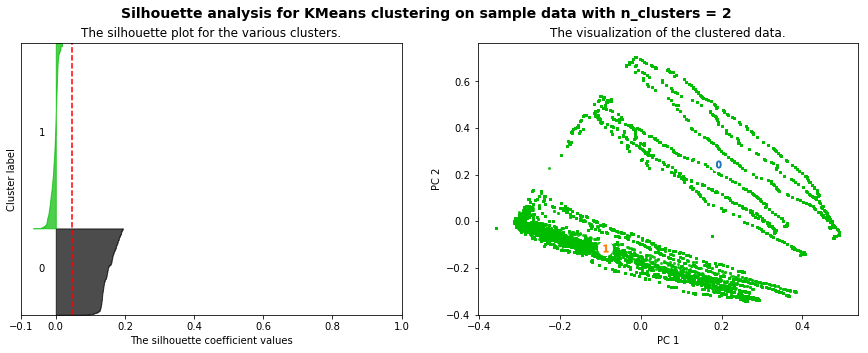

For n_clusters = 2, The average silhouette_score is : 0.046


In [203]:
X = groomTFVects.toarray()
plotSilhouette(2, X)

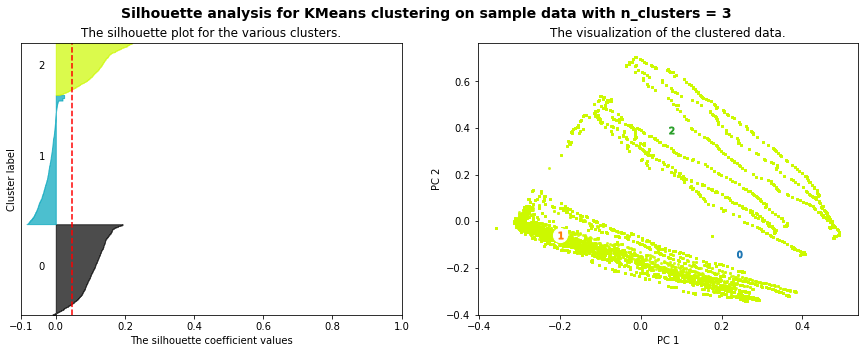

For n_clusters = 3, The average silhouette_score is : 0.047


In [204]:
X = groomTFVects.toarray()
plotSilhouette(3, X)

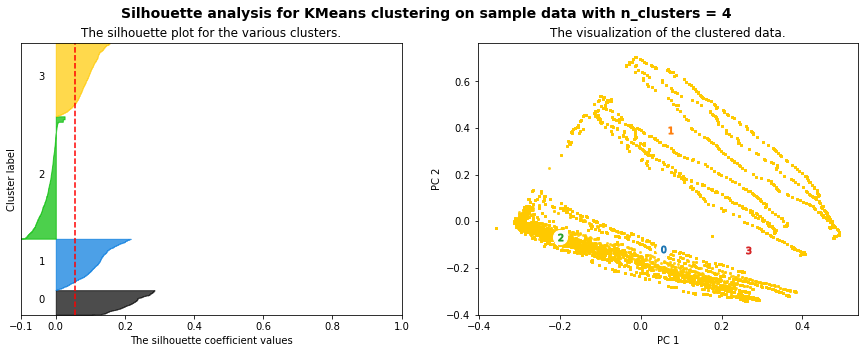

For n_clusters = 4, The average silhouette_score is : 0.055


In [205]:
X = groomTFVects.toarray()
plotSilhouette(4, X)

In [150]:
#Similar parameters to before, but stricter max df and no max num occurrences
groomTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=.5, min_df=1, stop_words='english', norm='l2')
groomTFVects = groomTFVectorizer.fit_transform(grooms_wanted)
groomTFVectorizer.vocabulary_.get('sikh', 'boy')

'boy'

In [190]:
targetDF = grooms_wanted['text']
#textColumn = 'text'
numCategories = 2

In [191]:
exampleTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=.5, max_features=10000, min_df=1, stop_words='english', norm='l2')

exampleTFVects = exampleTFVectorizer.fit_transform(grooms_wanted['text'])

In [192]:

exampleKM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
exampleKM.fit(exampleTFVects)

KMeans(n_clusters=2)

In [193]:
examplePCA = sklearn.decomposition.PCA(n_components = 2).fit(exampleTFVects.toarray())
reducedPCA_data = examplePCA.transform(exampleTFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in exampleKM.labels_]

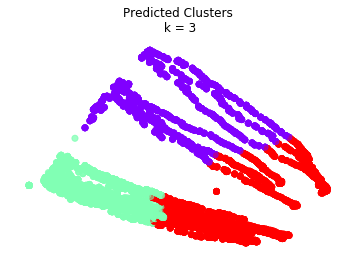

In [155]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numCategories))
plt.show()

## <font color="red">*Exercise 2*</font>

<font color="red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<font color="red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?


<font color="green"> Hierarchical clustering does pretty well, however owing to the large size of my data, I do not do it for the entire dataset and only a small subset of it (1000 ads not randomly sampled). However, I believe it could produce similar results as clustering even on the whole data because intuitively looking at the above clusters and with my knowledge of the social game, there are certain topics such as caste which could be overarching, and then within each group, descriptions regarding education, physical attributes, so on and so forth could vary an dheirarchical clustering could provide very interesting insights in such a case. </font>

In [5]:
groomTFVects[:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
groomCoocMat = groomTFVects * groomTFVects.T

groomCoocMat.setdiag(0)

/Users/pranathiiyer/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [7]:
subCoocMat = groomCoocMat[:100]

In [8]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

array([[28.        , 82.        ,  1.41421356,  2.        ],
       [32.        , 86.        ,  1.41421356,  2.        ],
       [ 5.        , 59.        ,  1.41421356,  2.        ],
       [ 7.        , 61.        ,  1.41421356,  2.        ],
       [26.        , 80.        ,  1.41421356,  2.        ],
       [45.        , 99.        ,  1.41421356,  2.        ],
       [42.        , 96.        ,  1.41421356,  2.        ],
       [31.        , 85.        ,  1.41421356,  2.        ],
       [44.        , 98.        ,  1.41421356,  2.        ],
       [ 1.        , 55.        ,  1.41421356,  2.        ]])

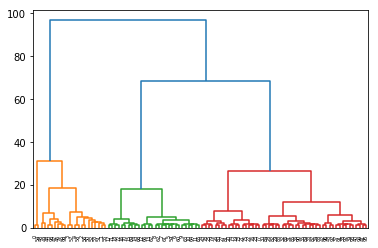

In [9]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

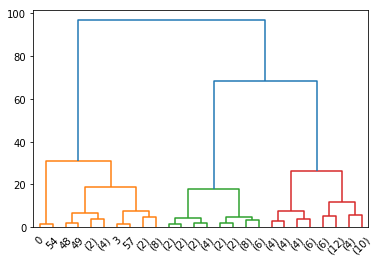

In [10]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

In [11]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 4, 'maxclust')
hierarchicalClusters

array([1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2], dtype=int32)

In [16]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(groomCoocMat[:1000].toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 4, 'maxclust')
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(grooms_wanted['text'][:1000], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(grooms_wanted['text'][:1000], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(grooms_wanted['text'][:1000], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(grooms_wanted['text'][:1000], hierarchicalClusters_full)))

For our complete clusters:
Homogeneity: 0.231
Completeness: 1.000
V-measure: 0.376
Adjusted Rand Score: 0.011


## <font color="red">*Exercise 3*</font>

<font color="red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<font color="red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</font> 

<font color="green"> Topic model surprisingly indicates some coheisive results. However most topics have the same words and top words (jat, usa, canada, sikh, rajput--all similar to what we saw in computational linguistucs), and this does not change despite the change in alpha or eta i.e the distribution of these words. This means that all these documents could perhaps be explained with 2 or 3 topics which would emerge more clearly once the data is cleaned. Moreover, this model does not look at the entire data set either. In fact, the extremely high similarity between certain topics (as is visible in the bar graphs and other visuls actually means that given sucg a large corpus of ads representing 5-6 states in india, they all address the same issue and look for extremely similar characteristics in their propsective grooms which is amusing for a social landscape as diverse as india and says a lot about the social game and players. </font>

In [20]:
grooms_wanted['tokenized_text'] = grooms_wanted['text'][:1000].apply(lambda x: lucem_illud.word_tokenize(str(x)))
grooms_wanted['normalized_tokens'] = grooms_wanted['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(str(x)))

In [21]:
grooms_wanted[::100]

,Unnamed: 0,text,tokenized_text,normalized_tokens
1,NOTE: Please do not send any images/photograph...,NOTE: Please do not send any images/photograph...,"[NOTE, Please, do, not, send, any, images, pho...","[note, send, images, photographs, reply, forwa..."
110,Alliance for beautiful Addharmi Ramdasia girl ...,Alliance for beautiful Addharmi Ramdasia girl ...,"[Alliance, for, beautiful, Addharmi, Ramdasia,...","[alliance, beautiful, addharmi, ramdasia, girl..."
217,Match for beautiful Garg girl 33/5'1 BAMS Resi...,Match for beautiful Garg girl 33/5'1 BAMS Resi...,"[Match, for, beautiful, Garg, girl, 33/5'1, BA...","[match, beautiful, garg, girl, 33/5'1, bams, r..."
324,Well established businessman/good serviceman f...,Well established businessman/good serviceman f...,"[Well, established, businessman, good, service...","[established, businessman, good, serviceman, s..."
431,Goyal MBBS girl at 5:32 pm 5'1½ beautiful fa...,Goyal MBBS girl at 5:32 pm 5'1½ beautiful fa...,"[Goyal, MBBS, girl, at, 5:32, pm, 5'1½, beauti...","[goyal, mbbs, girl, 5:32, pm, 5'1½, beautiful,..."
...,...,...,...,...
24653,Professionally qualified match for Jat Sikh gi...,Professionally qualified match for Jat Sikh gi...,NaN,[nan]
24760,US/Canada born or brought up accomplished cult...,US/Canada born or brought up accomplished cult...,NaN,[nan]
24860,ATS Prelude Derabassi new ready for occupation...,ATS Prelude Derabassi new ready for occupation...,NaN,[nan]
24967,Wanted educated match for 24/5'3 vegetarian Ca...,Wanted educated match for 24/5'3 vegetarian Ca...,NaN,[nan]


In [23]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]
grooms_wanted['reduced_tokens'] = grooms_wanted['normalized_tokens'].apply(lambda x: dropMissing(x, groomTFVectorizer.vocabulary_.keys()))

In [24]:
dictionary = gensim.corpora.Dictionary(grooms_wanted['reduced_tokens'])

In [25]:
corpus = [dictionary.doc2bow(text) for text in grooms_wanted['reduced_tokens']]

In [26]:
gensim.corpora.MmCorpus.serialize('grooms.mm', corpus)
senmm = gensim.corpora.MmCorpus('grooms.mm')

In [27]:
groomslda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

/Users/pranathiiyer/opt/anaconda3/lib/python3.8/site-packages/gensim/models/ldamodel.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [36]:
groom1Bow = dictionary.doc2bow(grooms_wanted['reduced_tokens'][1])
grooms1lda = groomslda[groom1Bow]
print("The topics of the text are{}".format(grooms1lda))


The topics of the text are[(3, 0.9157009)]


In [37]:
ldaDF = pandas.DataFrame({
        'topics' : [groomslda[dictionary.doc2bow(l)] for l in grooms_wanted['reduced_tokens']]
    })

In [38]:

topicsProbDict = {i : [0] * len(ldaDF) for i in range(groomslda.num_topics)}


for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob


for topicNum in range(groomslda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,"[(0, 0.037545707), (1, 0.03553053), (2, 0.0375...",0.037546,0.035531,0.037505,0.658716,0.040019,0.036862,0.040129,0.039006,0.038353,0.036335
101,"[(3, 0.96523947)]",0.000000,0.000000,0.000000,0.965239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
201,"[(0, 0.011861648), (1, 0.011218446), (2, 0.011...",0.011862,0.011218,0.011836,0.012755,0.012625,0.011638,0.892173,0.012311,0.012109,0.011473
301,"[(6, 0.93202883)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932029,0.000000,0.000000,0.000000
401,"[(6, 0.9579437)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.957944,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
22801,"[(0, 0.098403096), (1, 0.09317812), (2, 0.0982...",0.098403,0.093178,0.098266,0.105778,0.104762,0.096654,0.104994,0.102180,0.100500,0.095285
22901,"[(0, 0.098403096), (1, 0.09317812), (2, 0.0982...",0.098403,0.093178,0.098266,0.105778,0.104762,0.096654,0.104994,0.102180,0.100500,0.095285
23001,"[(0, 0.098403096), (1, 0.09317812), (2, 0.0982...",0.098403,0.093178,0.098266,0.105778,0.104762,0.096654,0.104994,0.102180,0.100500,0.095285
23101,"[(0, 0.098403096), (1, 0.09317812), (2, 0.0982...",0.098403,0.093178,0.098266,0.105778,0.104762,0.096654,0.104994,0.102180,0.100500,0.095285


In [43]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10]
ldaDFVis = ldaDFV.to_numpy()
ldaDFVisNames = ldaDFVisN.to_numpy()
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.000000,0.000000,0.000000,0.915700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.037546,0.035531,0.037505,0.658716,0.040019,0.036862,0.040129,0.039006,0.038353,0.036335
2,0.037538,0.035525,0.655693,0.040498,0.040042,0.036872,0.040112,0.039010,0.038356,0.036354
3,0.018734,0.017744,0.018711,0.020186,0.829429,0.018404,0.020017,0.019481,0.019142,0.018154
4,0.013121,0.012418,0.013106,0.014136,0.013987,0.012887,0.322269,0.013642,0.013404,0.571030
5,0.000000,0.000000,0.000000,0.937062,0.061045,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.932994,0.065103,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.912357,0.085729,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.947038,0.050977,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.949993,0.047956,0.000000,0.000000,0.000000,0.000000,0.000000


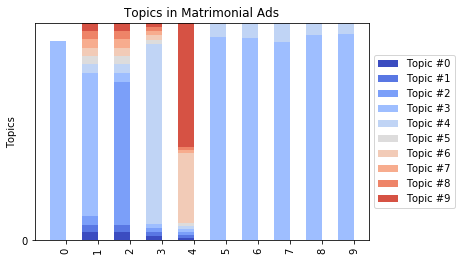

In [56]:
N = 10
ind = np.arange(N)
K = groomslda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Matrimonial Ads')
plt.xticks(ind+width/2, ind,rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

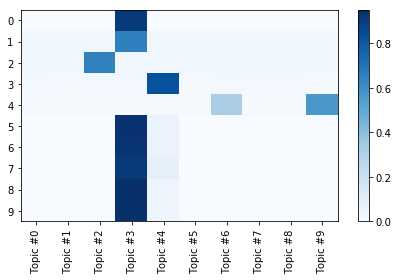

In [58]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ind);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [59]:
groomslda.show_topic(1)

[('jat', 0.00856424),
 ('usa', 0.0075958353),
 ('daughter', 0.0074588046),
 ('rajput', 0.0055302237),
 ('mtech', 0.005241524),
 ('canada', 0.0047544334),
 ('pr', 0.004751398),
 ('parents', 0.004404326),
 ('mobile', 0.004056581),
 ('delhi', 0.004008743)]

In [60]:
topicsDict = {}
for topicNum in range(groomslda.num_topics):
    topicWords = [w for w, p in groomslda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,jat,jat,usa,jat,jat,usa,jat,usa,usa,jat
1,usa,usa,jat,usa,usa,jat,usa,jat,daughter,usa
2,rajput,daughter,pr,daughter,canada,daughter,pr,pr,jat,daughter
3,parents,rajput,rajput,canada,daughter,canada,rajput,daughter,pr,canada
4,daughter,mtech,daughter,mtech,mtech,rajput,daughter,canada,mtech,pr
5,delhi,canada,bsc,delhi,pr,pr,mtech,parents,canada,parents
6,businessman,pr,canada,pr,rajput,parents,mobile,rajput,mother,looking
7,mtech,parents,delhi,parents,graduate,c4,delhi,delhi,delhi,rajput
8,pr,mobile,mtech,bsc,india,bsc,ms,canadian,rajput,australian
9,handsome,delhi,pursuing,rajput,bsc,graduate,handsome,india,himachali,c4


<Figure size 432x288 with 0 Axes>

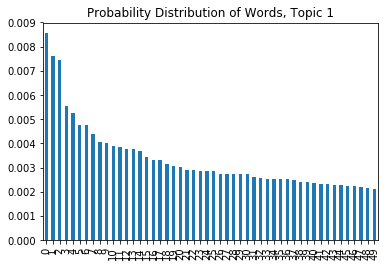

In [61]:
topic1_df = pandas.DataFrame(groomslda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [62]:
groomslda1 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.00001)
groomslda2 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.9)

/Users/pranathiiyer/opt/anaconda3/lib/python3.8/site-packages/gensim/models/ldamodel.py:846: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


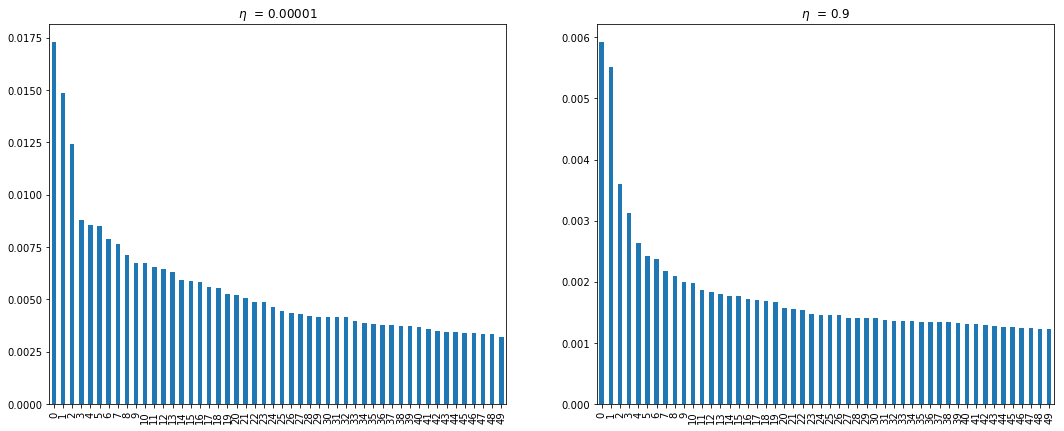

In [63]:
topic11_df = pandas.DataFrame(groomslda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(groomslda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

In [64]:
from gensim.models import HdpModel

In [65]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.print_topics()

[(0,
  '0.018*jat + 0.012*usa + 0.011*daughter + 0.009*mtech + 0.008*rajput + 0.008*delhi + 0.008*pr + 0.007*parents + 0.007*canada + 0.007*mobile'),
 (1,
  '0.021*jat + 0.019*usa + 0.011*canada + 0.010*daughter + 0.008*pr + 0.008*india + 0.007*canadian + 0.007*parents + 0.006*rajput + 0.006*respond'),
 (2,
  '0.014*usa + 0.011*jat + 0.008*c4 + 0.007*daughter + 0.007*pr + 0.007*graduate + 0.007*rajput + 0.006*canada + 0.006*parents + 0.006*australian'),
 (3,
  '0.010*graduate + 0.009*usa + 0.008*daughter + 0.007*manager + 0.007*jat + 0.007*c4 + 0.007*mob + 0.007*early + 0.007*company + 0.006*having'),
 (4,
  '0.013*usa + 0.010*jat + 0.007*canada + 0.007*pursuing + 0.007*pr + 0.007*rajput + 0.006*australian + 0.006*bsc + 0.006*c4 + 0.006*india'),
 (5,
  '0.012*jat + 0.011*usa + 0.010*daughter + 0.008*canadian + 0.007*pr + 0.006*canada + 0.006*india + 0.006*looking + 0.005*parents + 0.005*respond'),
 (6,
  '0.009*usa + 0.006*pr + 0.005*australian + 0.005*diploma + 0.004*jat + 0.004*bsc +